In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('3_12_Steering_Angle_left_to_right.txt') as f:
    lines = f.readlines()
    
print(len(lines))
print(lines[2])

831
[index=2][0x065][8][hnd=0][flag=2][0x3D 0x13 0x3D 0x13 0x00 0x00 0x00 0x00]



In [2]:
def Hex2Dec(data):
    return int(data, 16)    

In [3]:
Hex2Dec('0x133d')

4925

In [4]:
def GetSteerData(line):
    
    if len(line)== 76:
        i = 34
    elif len(line)== 77:
        i = 35
    elif len(line)== 78:
        i = 36
    elif len(line)== 79:
        i = 37 
    elif len(line)== 80:
        i = 38    
    
    Angle = line[i+8] + line[i+9] + line[i+3] + line[i+4]
    CMD = line[i+18] + line[i+19] + line[i+13] + line[i+14]
 
    Angle = int(Angle, 16)
    CMD = int(CMD, 16)

    if(Angle>=60000):        #right
        Angle = Angle-65536
        
    if(CMD>=60000):        #right
        CMD = CMD-65536
    
    return Angle/10, CMD/10

In [5]:
## test 
i = 2
Angle, CMD = GetSteerData(lines[i])
print(Angle,CMD)

492.5 492.5


In [6]:
Angles = []
CMDs = []

for i in range(len(lines)):
    
    if len(lines[i])== 76:
        if lines[i][14] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)

    elif len(lines[i])== 77:
        if lines[i][15] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)    
    
    elif len(lines[i])== 78:
        if lines[i][16] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)
            
    elif len(lines[i])== 79:
        if lines[i][17] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)
            
    elif len(lines[i])== 80:
        if lines[i][18] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)
            
#print(Angles)

n_data:  283


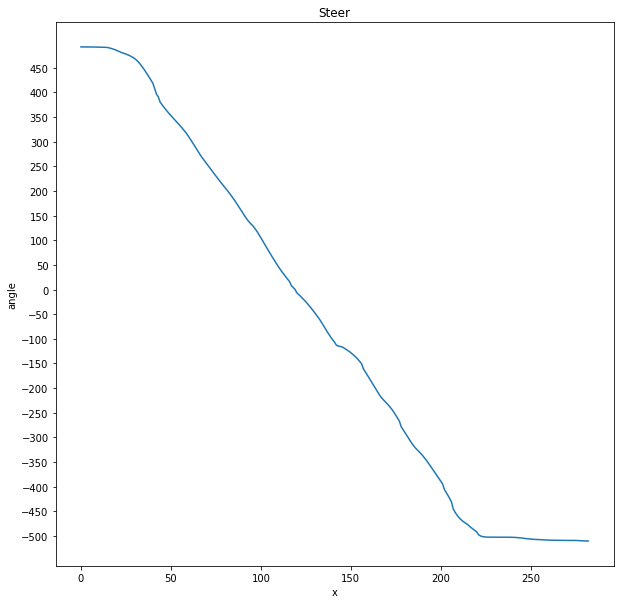

In [7]:
print("n_data: ",len(Angles))
x = np.arange(0,len(Angles))
plt.figure(figsize=(10, 10)) 
plt.plot(x, Angles)
plt.ylabel("angle")
plt.xlabel("x")
plt.title("Steer")
my_x_ticks = np.arange(0, len(Angles), 50)
my_y_ticks = np.arange(-500, 500, 50)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

In [8]:
with open('3_12_wheel_speed_0kmh_35kmh.txt') as f:
    lines = f.readlines()
    
print(len(lines))
print(lines[0])

2062
[index=0][0x06A][8][hnd=0][flag=2][0x00 0x00 0x00 0x00 0x00 0x00 0x00 0x00]



In [9]:
def GetWheelData(line):
    
    if len(line)== 76:
        i = 34
    elif len(line)== 77:
        i = 35
    elif len(line)== 78:
        i = 36
    elif len(line)== 79:
        i = 37 
    elif len(line)== 80:
        i = 38
    
    FL = line[i+8] + line[i+9] + line[i+3] + line[i+4]
    FR = line[i+18] + line[i+19] + line[i+13] + line[i+14]

    RL = line[i+28] + line[i+29] + line[i+23] + line[i+24]
    RR = line[i+38] + line[i+39] + line[i+33] + line[i+34]

    FL = int(FL, 16)
    FR = int(FR, 16)
    RL = int(RL, 16)
    RR = int(RR, 16)
    
    if(FL>32767):
        FL = FL-65536
    
    if(FR>32767):
        FR = FR-65536  
    
    if(RL>32767):
        RL = RL-65536  
        
    if(RR>32767):
        RR = RR-65536  
    
    return FL/100, FR/100, RL/100, RR/100

In [10]:
##TEST
i = 600
print(lines[i])
FL, FR, RL, RR = GetWheelData(lines[i]);
print(FL, FR, RL, RR)

[index=600][0x06A][8][hnd=0][flag=2][0xC9 0x06 0xC5 0x06 0xC0 0x06 0xC0 0x06]

17.37 17.33 17.28 17.28


In [11]:
FLs = []
FRs = []
RLs = []
RRs = []

for i in range(len(lines)):
    
    if len(lines[i])== 76:
        if lines[i][14] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
            
    elif len(lines[i])== 77:   
        if lines[i][15] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
                    
    elif len(lines[i])== 78:  
        if lines[i][16] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
                    
    elif len(lines[i])== 79:
        if lines[i][17] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
                      
    elif len(lines[i])== 80:   
        if lines[i][18] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
            
#print(FLs)

n_data:  1383


Text(0.5,1,'FLs')

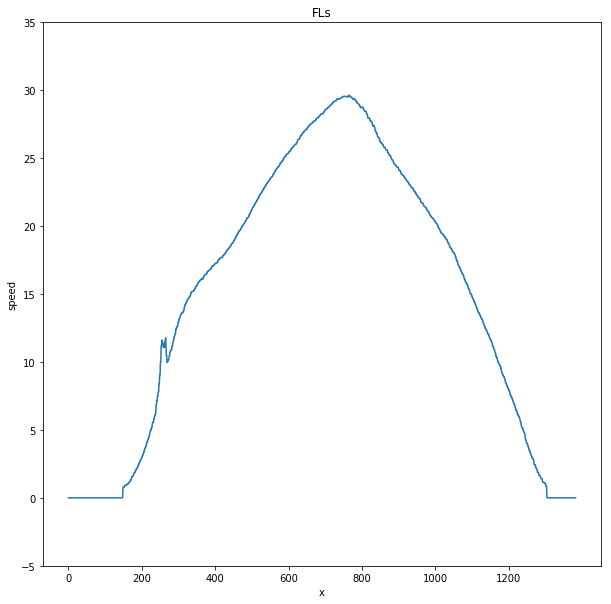

In [12]:
print("n_data: ", len(FLs))
x = np.arange(0,len(FLs))
plt.figure(figsize=(10, 10)) 
plt.plot(x, FLs)
plt.ylabel("speed")
plt.xlabel("x")
my_x_ticks = np.arange(0, len(FLs), 200)
my_y_ticks = np.arange(-5, 40, 5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.title("FLs")

1383


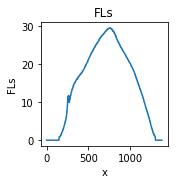

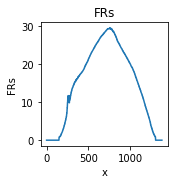

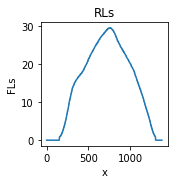

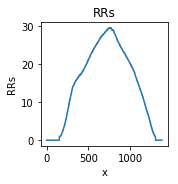

In [13]:
print(len(FLs))

x = np.arange(0,len(FLs))
plt.figure(figsize=(5, 5)) 
plt.subplot(221)
plt.plot(x, FLs)
plt.ylabel("FLs")
plt.xlabel("x")
plt.title("FLs")

x = np.arange(0,len(FRs))
plt.figure(figsize=(5, 5)) 
plt.subplot(222)
plt.plot(x, FRs)
plt.ylabel("FRs")
plt.xlabel("x")
plt.title("FRs")

x = np.arange(0,len(RLs))
plt.figure(figsize=(5, 5)) 
plt.subplot(223)
plt.plot(x, RLs)
plt.ylabel("FLs")
plt.xlabel("x")
plt.title("RLs")

x = np.arange(0,len(RRs))
plt.figure(figsize=(5, 5)) 
plt.subplot(224)
plt.plot(x, RRs)
plt.ylabel("RRs")
plt.xlabel("x")
plt.title("RRs")


plt.show()